In [1]:
# import classy module
from classy import Class

In [27]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()

In [28]:
# get all C_l output
cls = LambdaCDM.lensed_cl(2500)


In [29]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

In [32]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

In [33]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

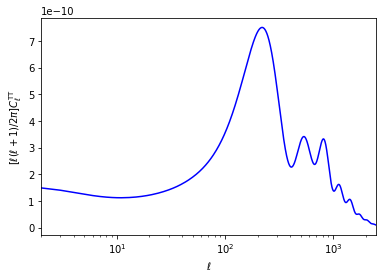

In [34]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'b-')

## Starting to mess with dm dr interactions

In [2]:
# create instance of the class "Class"
mycos = Class()
# pass input parameters
mycos.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})
mycos.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

mycos.set({'f_idm_dr':0.1, 'xi_idr':0.9, 'a_idm_dr':1})
# run class
mycos.compute()

In [45]:
# get all C_l output
mycls = mycos.lensed_cl(2500)

myll = mycls['ell'][2:]
myclTT = mycls['tt'][2:]
myclEE = mycls['ee'][2:]
myclPP = mycls['pp'][2:]

In [52]:
# get P(k) at redhsift z=0
import numpy as np
mykk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
myPk = [] # P(k) in (Mpc/h)**3
myh = mycos.h() # get reduced Hubble for conversions to 1/Mpc
for k in mykk:
    myPk.append(mycos.pk(k*myh,0.)*myh**3) # function .pk(k,z)

In [47]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

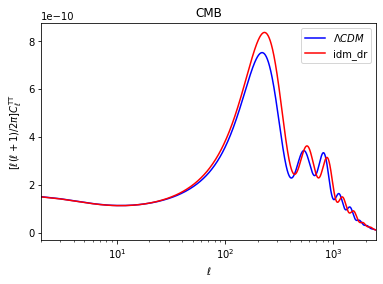

In [48]:
# plot C_l^TT Angular Power Spectrum
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'b-',label=r'$\Lambda CDM$')
plt.title('CMB')

plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(myll,myclTT*myll*(myll+1)/2./pi,'r-', label='idm_dr')

plt.legend()
plt.show()

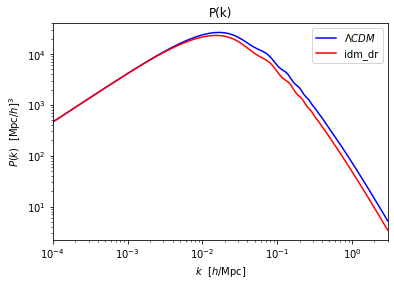

In [53]:
# plot Matter Power Spectrum
plt.figure(2)
plt.xscale('log'); plt.yscale('log');
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.title('P(k)')
plt.xlim(kk[0],kk[-1])
plt.plot(kk,Pk,'b-', label=r'$\Lambda CDM$')

plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(mykk[0],mykk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(mykk,myPk,'r-', label='idm_dr')

plt.legend()
plt.show()

# BEFORE

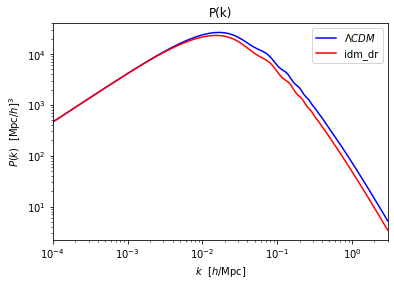

In [49]:
# plot Matter Power Spectrum
plt.figure(2)
plt.xscale('log'); plt.yscale('log');
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.title('P(k)')
plt.xlim(kk[0],kk[-1])
plt.plot(kk,Pk,'b-', label=r'$\Lambda CDM$')

plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(mykk[0],mykk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(mykk,myPk,'r-', label='idm_dr')

plt.legend()
plt.show()

## Now Mess with thermodynamics.c

In [37]:
# create instance of the class "Class"
mycos = Class()
# pass input parameters
mycos.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})
mycos.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

mycos.set({'f_idm_dr':0.1, 'xi_idr':0.9, 'a_idm_dr':1})
# run class
mycos.compute()

In [38]:
# get all C_l output
mycls = mycos.lensed_cl(2500)

myll = mycls['ell'][2:]
myclTT = mycls['tt'][2:]
myclEE = mycls['ee'][2:]
myclPP = mycls['pp'][2:]

In [39]:
# get P(k) at redhsift z=0
import numpy as np
mykk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
myPk = [] # P(k) in (Mpc/h)**3
myh = mycos.h() # get reduced Hubble for conversions to 1/Mpc
for k in mykk:
    myPk.append(mycos.pk(k*myh,0.)*myh**3) # function .pk(k,z)

In [40]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

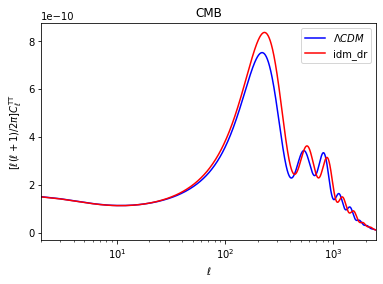

In [41]:
# plot C_l^TT Angular Power Spectrum
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'b-',label=r'$\Lambda CDM$')
plt.title('CMB')

plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(myll,myclTT*myll*(myll+1)/2./pi,'r-', label='idm_dr')

plt.legend()
plt.show()

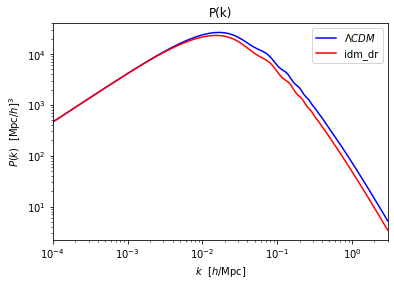

In [42]:
# plot Matter Power Spectrum
plt.figure(2)
plt.xscale('log'); plt.yscale('log');
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.title('P(k)')
plt.xlim(kk[0],kk[-1])
plt.plot(kk,Pk,'b-', label=r'$\Lambda CDM$')

plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(mykk[0],mykk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(mykk,myPk,'r-', label='idm_dr')

plt.legend()
plt.show()